In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Effectiveness and Efficiency Tradeoff

In [3]:
# figure 3a and 3b
# fpath = './output_files/figure3a/3a_results.csv'
# savepath = './output_files/figure3a/figure3a.png'

fpath = './output_files/figure3b/3b_results.csv'
savepath = './output_files/figure3b/figure3b.png'

df = pd.read_csv(fpath)

In [4]:
datasets = df['Dataset'].unique()

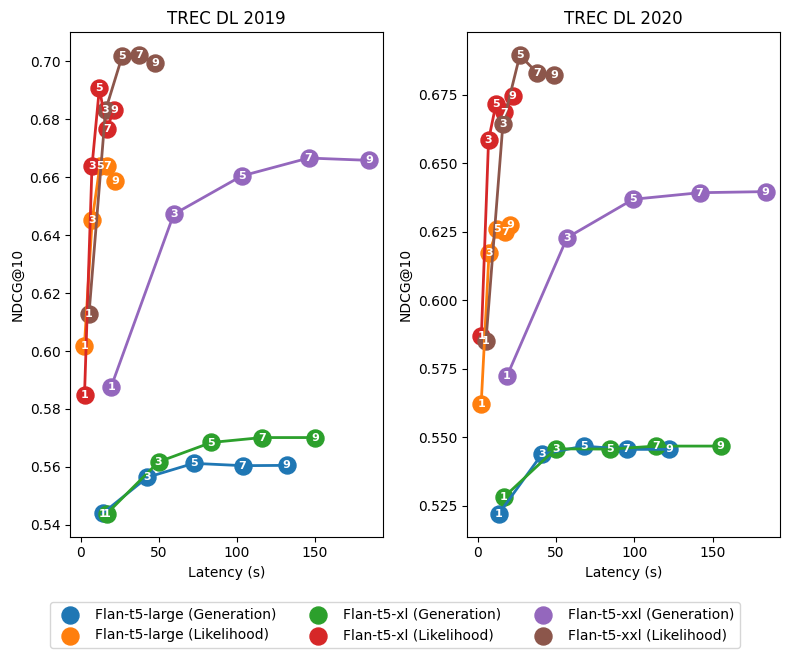

In [5]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(8, 6), sharey=False)

# Colors for the plots
colors = plt.cm.tab10.colors

# Collect handles and labels for the common legend
handles = []
labels = []

for i, dataset in enumerate(datasets):
    ax = axes[i]
    subset = df[df['Dataset'] == dataset]
    
    # Group by model and sorting method
    for idx, ((model, sorting_method), group) in enumerate(subset.groupby(['Model', 'Sorting Method'])):
        # Line plot
        line, = ax.plot(
            group['Latency'], group['NDCG@10'], 
            label=f'{model} ({sorting_method})', 
            color=colors[idx % len(colors)], 
            linewidth=2
        )
        
        # Scatter plot
        scatter = ax.scatter(
            group['Latency'], group['NDCG@10'], 
            label=f'{model} ({sorting_method})', 
            s=150,  # Marker size
            color=colors[idx % len(colors)], 
            edgecolor=None  # Add a border for better visibility
        )
        
        # Annotate points with 'c' values in white
        for x, y, c_value in zip(group['Latency'], group['NDCG@10'], group['R']):
            ax.text(x, y, f'{c_value}', fontsize=8, ha='center', va='center', color='white', weight='bold')
        
        # Collect handles and labels (only once)
        if f'{model} ({sorting_method})' not in labels:
            handles.append(scatter)
            labels.append(f'{model} ({sorting_method})')
    
    ax.set_title(f'{dataset}')
    ax.set_xlabel('Latency (s)')
    ax.set_ylabel('NDCG@10')
    ax.grid(False)

    

# Add a common legend outside the subplots
fig.legend(handles, labels, loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.1))

# Adjust layout to accommodate legend
plt.tight_layout()
# plt.show()
fig.savefig(savepath, dpi=300, bbox_inches='tight')  # Save the figure

# plt.close()

## Sensitivity to Inital Ranking

In [2]:
# figure 4
fpath = './output_files/figure4/figure4_results.csv'
savepath = './output_files/figure4/figure4.png'

In [3]:
df = pd.read_csv(fpath)

In [5]:
df['final_method'] = df.apply(lambda x: f"{x['Ranking Method']}.{x['Sorting Method']}", axis=1)

In [12]:
shuffle_method_map = {
    np.nan: 'BM25',
    'Random': 'RandomBM25',
    'Inverse': 'InverseBM25'
}

In [18]:
df['final_shuffle_method'] = df['Shuffle'].apply(lambda x: shuffle_method_map[x])

In [20]:
df = df[['Dataset', 'final_method', 'final_shuffle_method', 'NDCG@10']]

In [51]:
order = ['listwise.generate', 'listwise.likelihood', 'pairwise.heapsort', 'setwise.heapsort', 'pairwise.bubblesort', 'setwise.bubblesort']

/tmp/ipykernel_3958782/480326509.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['final_method'] = pd.Categorical(subset['final_method'], categories=order, ordered=True)
/tmp/ipykernel_3958782/480326509.py:20: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_df = subset.pivot_table(index='final_method', columns='final_shuffle_method', values='NDCG@10')
/tmp/ipykernel_3958782/480326509.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

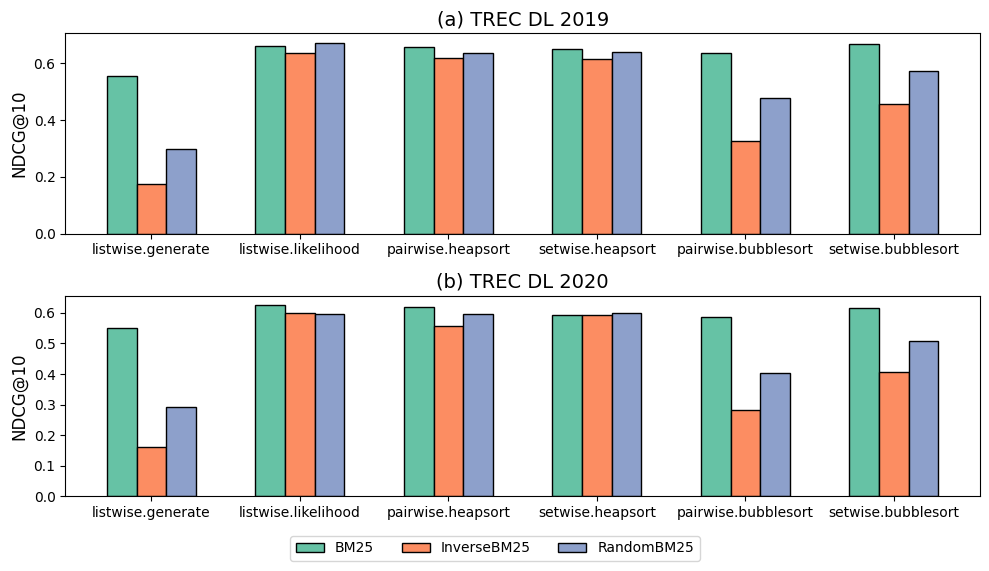

In [53]:
fig, axes = plt.subplots(nrows=len(datasets), ncols=1, figsize=(10, 6), sharex=False)


# colors = plt.cm.tab10.colors
palette = sns.color_palette("Set2", 8)
bar_width = 0.2

# Collect handles and labels for the common legend
handles = []
labels = []

for i, dataset in enumerate(datasets):
    if i == 0:
        subfigure = 'a'
    else:
        subfigure = 'b'
    ax = axes[i]
    subset = df[df['Dataset'] == dataset]
    subset['final_method'] = pd.Categorical(subset['final_method'], categories=order, ordered=True)
    pivot_df = subset.pivot_table(index='final_method', columns='final_shuffle_method', values='NDCG@10')

    x = np.arange(len(pivot_df.index))
    shuffle_methods = pivot_df.columns

    # Plot bars for each shuffle method
    for j, shuffle_method in enumerate(shuffle_methods):
        # bars = ax.bar(x + j * bar_width, pivot_df[shuffle_method], bar_width, label=shuffle_method, color=palette[j % len(palette)])
        bars = ax.bar(x + j * bar_width, pivot_df[shuffle_method], bar_width, label=shuffle_method, color=palette[j % len(palette)], edgecolor='black')
        if i == 0:  # Collect legend items only once
            handles.append(bars[0])
            labels.append(shuffle_method)

    # Customization
    ax.set_ylabel('NDCG@10', fontsize=12)
    ax.set_xticks(x + bar_width * (len(shuffle_methods) - 1) / 2)
    ax.set_xticklabels(pivot_df.index, fontsize=10)
    ax.set_title(f'({subfigure}) {dataset}', fontsize=14)

# Add a common legend at the top of the figure
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.005), ncol=len(shuffle_methods), fontsize=10, title=None)

# Add a figure title at the bottom
# fig.suptitle('Comparison of NDCG@10 Across Methods and Datasets', fontsize=16, y=0.02)

# Adjust layout
plt.tight_layout(rect=[0, 0.05, 1, 0.95])  # Leave space for the title and legend
# plt.show()
# plt.show()
fig.savefig(savepath, dpi=300, bbox_inches='tight')  # Save the figure